In [35]:
import dlib
import cv2
import sys
import numpy as np
import matplotlib.pyplot as plt
# add eyes package for module imports
sys.path.append('..')

### Initialize dlib face detector and landmarks predictor

Download pretrained shape_predictor from: [download link](http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2)

In [36]:
%%time
face_detector      = dlib.get_frontal_face_detector()
landmark_predictor = dlib.shape_predictor('shape_predictor_68_face_landmarks.dat')

CPU times: user 959 ms, sys: 69.3 ms, total: 1.03 s
Wall time: 1.03 s


In [37]:
def read_image(path):
    image = dlib.load_rgb_image(path)
    return image

def get_landmarks(path):
    image = read_image(path)
    faces = face_detector(image, 1)
    landmark_tuple = []
    for k, d in enumerate(faces):
        landmarks = landmark_predictor(image, d)
        for n in range(0, 27):
            x = landmarks.part(n).x
            y = landmarks.part(n).y
            landmark_tuple.append((x, y))
            cv2.circle(image, (x, y), 2, (255, 255, 0), -1)
    
    return 

In [38]:
image = dlib.load_rgb_image('../assets/face.png')
faces = face_detector(img, 1)

In [53]:
def get_coordinates(landmarks, indices, x_fun, y_fun):
    xs = [landmarks.part(i).x for i in indices]
    ys = [landmarks.part(i).y for i in indices]
    return x_fun(xs), y_fun(ys)

In [64]:
def eyes_nose_region(path):
    image = read_image(path)
    faces = face_detector(image, 1)
    face_ = faces[0]
    landmarks = landmark_predictor(image, face_)
    l_eyebrow = get_coordinates(landmarks, range(18, 23), min, min)
    r_eyebrow = get_coordinates(landmarks, range(23, 28), max, min)
    nose      = get_coordinates(landmarks, range(32, 37), min, max)
    l_ear     = get_coordinates(landmarks, range(1, 4), min, min)
    r_ear     = get_coordinates(landmarks, range(15, 18), max, min)
    regions   = [l_eyebrow, r_eyebrow, nose, l_ear, r_ear]
    xs        = [x for (x, _) in regions]
    ys        = [y for (_, y) in regions]
    return {
        'x_max' : max(xs),
        'x_min' : min(xs),
        'y_max' : max(ys),
        'y_min' : min(ys),
    }, image

In [65]:
eyes_nose_region('../assets/face.png')

({'x_max': 282, 'x_min': 35, 'y_max': 195, 'y_min': 71},
 array([[[163, 151, 139],
         [163, 151, 139],
         [161, 149, 137],
         ...,
         [162, 146, 131],
         [162, 146, 131],
         [163, 147, 132]],
 
        [[164, 150, 137],
         [164, 150, 137],
         [161, 149, 137],
         ...,
         [162, 146, 131],
         [162, 146, 131],
         [163, 147, 132]],
 
        [[165, 151, 140],
         [164, 150, 139],
         [163, 149, 136],
         ...,
         [163, 147, 132],
         [163, 147, 132],
         [164, 148, 133]],
 
        ...,
 
        [[ 12,   8,   7],
         [ 12,   8,   7],
         [ 10,   8,   9],
         ...,
         [ 89,  76,  34],
         [ 75,  65,  29],
         [ 51,  42,  11]],
 
        [[ 15,  10,   7],
         [ 14,  10,   9],
         [ 12,  10,  11],
         ...,
         [ 87,  77,  41],
         [ 73,  64,  31],
         [ 42,  35,   7]],
 
        [[ 14,   9,   5],
         [ 12,   8,   5],
         [ 

In [70]:
def get_mask(path):
    cs, img = eyes_nose_region(path)
    w, h, c = img.shape
    mask    = np.zeros((w, h)).astype(bool)
    mask[cs['x_min'] : cs['x_max'], cs['y_min'] : cs['y_max']] = True
    output = np.zeros_like(img)
    output[mask] = img[mask]
    return output

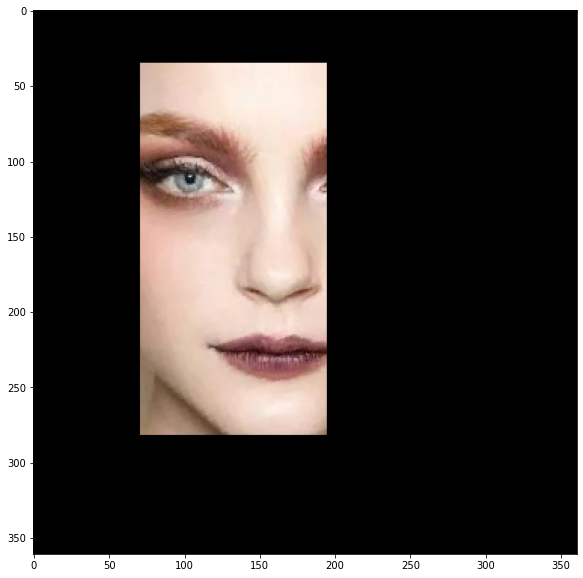

In [71]:
# mask = np.zeros((img.shape[0], img.shape[1]))
# mask = cv2.fillConvexPoly(mask, np.array(routes), 1)
# mask = mask.astype(bool)
 
# out = np.zeros_like(img)
# out[mask] = img[mask]

out = get_mask('../assets/face.png')
 
plt.figure(figsize=(10,10))
plt.imshow(out)